# Time Based Phase Shift

## Reciever For Phase Shift Transmission

Starting UDP packet capture...
Received UDP packet at 1714986620.4981503
Received UDP packet at 1714986620.753024
Received UDP packet at 1714986621.1309154
Received UDP packet at 1714986621.5092235
Received UDP packet at 1714986621.761693
Received UDP packet at 1714986622.0143523
Received UDP packet at 1714986622.2673295
Received UDP packet at 1714986622.6457257
Received UDP packet at 1714986623.0247896
Received UDP packet at 1714986623.277593
Received UDP packet at 1714986623.654897
Received UDP packet at 1714986624.0336194
Received UDP packet at 1714986624.287482
Received UDP packet at 1714986624.5400374
Received UDP packet at 1714986624.792527
Received UDP packet at 1714986625.0460184
Received UDP packet at 1714986625.4241555
Received UDP packet at 1714986625.6765237
Received UDP packet at 1714986626.0549862
Received UDP packet at 1714986626.432602
Received UDP packet at 1714986626.811201
Received UDP packet at 1714986627.0628421
Received UDP packet at 1714986627.4414964
Received UD

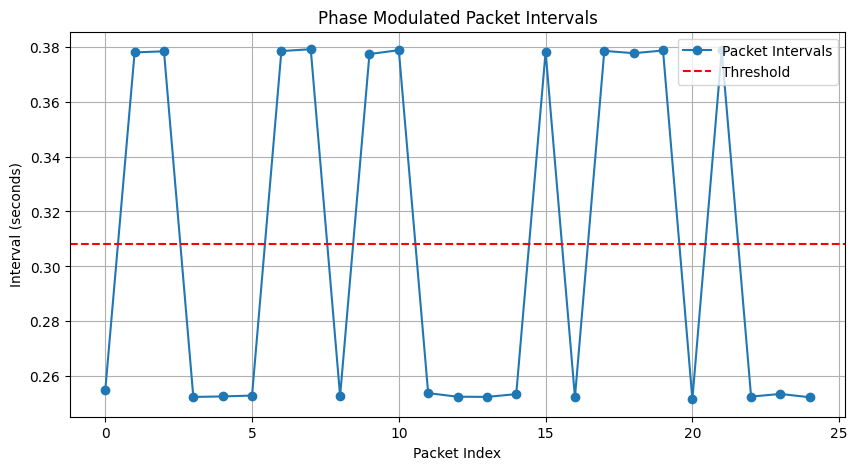

Decoded binary data: 0110001101100001011101000
Tranlated to ASCII: {'cat'}


In [6]:
from scapy.all import sniff, IP, UDP
import matplotlib.pyplot as plt
import numpy as np
import time

timestamps = []  # Global list to store packet timestamps

def binary_to_text(binary):
    # Ensure the binary string length is a multiple of 8
    if len(binary) % 8 != 0:
        print("Warning: Binary string length is not a multiple of 8. Extra bits may be ignored.")

    # Convert binary string into ASCII text
    text = ''.join(chr(int(binary[i:i+8], 2)) for i in range(0, len(binary) - len(binary) % 8, 8))
    return text

def handle_packet(packet):
    """ Handle each packet, log its arrival time. """
    if packet.haslayer(UDP):
        current_time = time.time()
        timestamps.append(current_time)
        print(f"Received UDP packet at {current_time}")

def plot_and_decode_intervals(timestamps):
    """ Plot packet arrival intervals and decode them into binary data. """
    intervals = np.diff(timestamps)  # Calculate intervals between packet receptions
    threshold = np.mean(intervals)  # Define threshold to distinguish binary '0' and '1'
    binary_data = ''.join(['0' if interval < threshold else '1' for interval in intervals])

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(intervals, 'o-', label='Packet Intervals')
    plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
    plt.title('Phase Modulated Packet Intervals')
    plt.xlabel('Packet Index')
    plt.ylabel('Interval (seconds)')
    plt.grid(True)
    plt.legend()
    plt.show()

    print(f"Decoded binary data: {binary_data}")
    data_text = binary_to_text(binary_data)
    print(f"Tranlated to ASCII:", {data_text})


def main():
    # Start packet sniffing
    print("Starting UDP packet capture...")
    sniff(filter="udp port 12345", prn=handle_packet, store=False, timeout=30)  # Adjust timeout as necessary

    # After capture, process and plot
    if len(timestamps) > 1:
        plot_and_decode_intervals(timestamps)

if __name__ == "__main__":
    main()

## Receive Phase Modulation by Port Number

Starting UDP packet capture...
Received UDP packet on port 12345 at time 1714987587.805669
Received UDP packet on port 12346 at time 1714987588.808349
Received UDP packet on port 12346 at time 1714987589.811161
Received UDP packet on port 12345 at time 1714987590.813954
Received UDP packet on port 12345 at time 1714987591.816623
Received UDP packet on port 12345 at time 1714987592.821459
Received UDP packet on port 12346 at time 1714987593.825127
Received UDP packet on port 12346 at time 1714987594.828262
Received UDP packet on port 12345 at time 1714987595.832423
Received UDP packet on port 12346 at time 1714987596.835044
Received UDP packet on port 12346 at time 1714987597.837583
Received UDP packet on port 12345 at time 1714987598.840075
Received UDP packet on port 12345 at time 1714987599.843609
Received UDP packet on port 12345 at time 1714987600.84725
Received UDP packet on port 12345 at time 1714987601.850258
Received UDP packet on port 12346 at time 1714987602.85309
Received UD

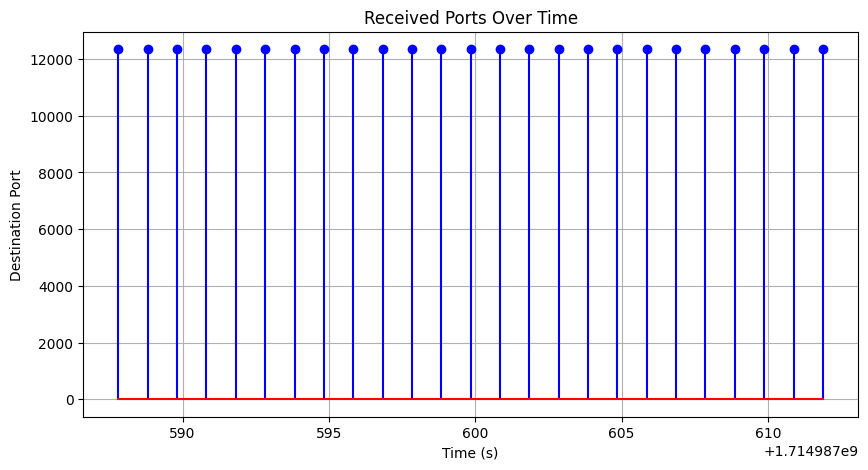

In [1]:
from scapy.all import sniff, IP, UDP
import matplotlib.pyplot as plt
import numpy as np


def binary_to_text(binary):
    # Ensure the binary string length is a multiple of 8
    if len(binary) % 8 != 0:
        print("Warning: Binary string length is not a multiple of 8. Extra bits may be ignored.")

    # Convert binary string into ASCII text
    text = ''.join(chr(int(binary[i:i+8], 2)) for i in range(0, len(binary) - len(binary) % 8, 8))
    return text
# Global lists to store packet data
timestamps = []
ports = []

def handle_packet(packet):
    """ Handle each packet, logging the timestamp and destination port. """
    if packet.haslayer(UDP):
        current_time = packet.time  # Capture the timestamp of the packet
        dest_port = packet[UDP].dport  # Capture the destination port of the packet
        timestamps.append(current_time)
        ports.append(dest_port)
        print(f"Received UDP packet on port {dest_port} at time {current_time}")

def plot_and_decode_ports(ports):
    """ Plot the sequence of received ports and decode them into binary data. """
    # Assume the base port is the smallest port received
    base_port = min(ports)
    binary_data = ['0' if port == base_port else '1' for port in ports]

    # Converting list of binary strings into a single binary string
    binary_data = ''.join(binary_data)
    print(f"Decoded binary data: {binary_data}")
    data_text = binary_to_text(binary_data)
    print(f"Tranlated to ASCII:", {data_text})

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.stem(timestamps, ports, linefmt='b-', markerfmt='bo', basefmt='r-')
    plt.title('Received Ports Over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Destination Port')
    plt.grid(True)
    plt.show()

def main():
    # Start packet sniffing
    print("Starting UDP packet capture...")
    sniff(filter="udp and portrange 12345-12350", prn=handle_packet, store=False, timeout=30)  # Adjust timeout as necessary

    # After capture, plot and decode
    if ports:
        plot_and_decode_ports(ports)

if __name__ == "__main__":
    main()

## Known Malicous Payload Transmission
